In [5]:
#https://www.kaggle.com/kyen89/1-sentiment-analysis-tf-idf?select=testData.tsv

import pandas as pd
import numpy as np

X_train=pd.read_csv('../Dataset/labeledTrainData.tsv',quoting=3,delimiter='\t',header=0)
X_train.head(5)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [6]:
X_test=pd.read_csv("../Dataset/testData.tsv",delimiter="\t",header=0)
X_train=X_train[:10000]
X_test=X_test[:10000]
print(len(X_train))
print(len(X_test))

10000
10000


In [7]:
X_train.shape

(10000, 3)

In [8]:
X_test.shape

(10000, 2)

In [9]:
X_test.head(5)

,id,review
0,12311_10,Naturally in a film who's main themes are of m...
1,8348_2,This movie is a disaster within a disaster fil...
2,5828_4,"All in all, this is a movie for kids. We saw i..."
3,7186_2,Afraid of the Dark left me with the impression...
4,12128_7,A very accurate depiction of small time mob li...


# Text Preprocessing


In [10]:
from bs4 import BeautifulSoup
import re
import nltk

In [11]:
def prep(review):
    
    # Remove HTML tags.
    review = BeautifulSoup(review,'html.parser').get_text()
    
    # Remove non-letters
    review = re.sub("[^a-zA-Z]", " ", review)
    
    # Lower case
    review = review.lower()
    
    # Tokenize to each word.
    token = nltk.word_tokenize(review)
    
    # Stemming
    review = [nltk.stem.SnowballStemmer('english').stem(w) for w in token]
    
    # Join the words back into one string separated by space, and return the result.
    return " ".join(review)

In [26]:
X_train['clean']=X_train['review'].apply(prep)
X_test['clean']=X_test['review'].apply(prep)

In [27]:
X_train['clean'].shape

(10000,)

In [28]:
#after adding clean column 
print('Training dim:',X_train.shape, 'Test dim:', X_test.shape)

Training dim: (10000, 4) Test dim: (10000, 3)


# TF_IDF

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import words
tv=TfidfVectorizer(ngram_range=(1,3),
                sublinear_tf=True,
                max_features=5000)

In [30]:
train_tv=tv.fit_transform(X_train['clean'])
test_tv=tv.transform(X_test['clean'])

In [31]:
vocab=tv.get_feature_names()
print(vocab[:5])

['abandon', 'abil', 'abil to', 'abl', 'abl to']


In [33]:
sum=np.sum(train_tv,axis=0)
checking=pd.DataFrame(sum,columns=vocab)

In [35]:
print("Training dim:",train_tv.shape,'Test dim:',test_tv.shape)

Training dim: (10000, 5000) Test dim: (10000, 5000)


In [55]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()
#Train the model using the training sets
gnb.fit(train_tv.toarray(), X_train['sentiment'])

GaussianNB()

In [ ]:
#Predict the response for train dataset
y_pred = gnb.predict(train_tv.toarray())

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(X_train['sentiment'], y_pred)

0.8823

In [ ]:
#Predict the response for test dataset
y_pred = gnb.predict(test_tv.toarray())


In [61]:
#MultinomialNB
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(train_tv.toarray(), X_train['sentiment'])
y_pred = gnb.predict(train_tv.toarray())
print(y_pred)

[0 1 0 ... 0 0 1]


In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(X_train['sentiment'], y_pred)

0.8823

In [74]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

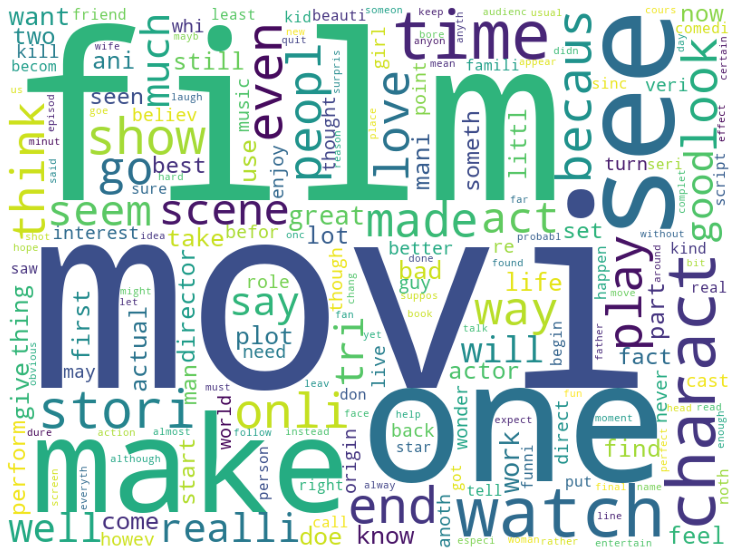

In [21]:
cloud(' '.join(X_train['clean']))